In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

### Acquire

In [2]:
df = acquire.acquire_agg_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169073 entries, 0 to 169072
Data columns (total 10 columns):
serial_number         169072 non-null object
model                 169073 non-null object
capacity_bytes        169073 non-null int64
max(failure)          169073 non-null int64
max(smart_9_raw)      161975 non-null float64
max(smart_5_raw)      161851 non-null float64
max(smart_187_raw)    104189 non-null float64
max(smart_188_raw)    104179 non-null float64
max(smart_197_raw)    161841 non-null float64
max(smart_198_raw)    161841 non-null float64
dtypes: float64(6), int64(2), object(2)
memory usage: 12.9+ MB


In [4]:
df.head()

,serial_number,model,capacity_bytes,max(failure),max(smart_9_raw),max(smart_5_raw),max(smart_187_raw),max(smart_188_raw),max(smart_197_raw),max(smart_198_raw)
0,PL1311LAG1SJAA,Hitachi HDS5C4040ALE630,4000787030016,0,43819.0,0.0,NaN,NaN,0.0,0.0
1,Z305KB36,ST4000DM000,4000787030016,0,31045.0,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi HDS5C3030ALA630,3000592982016,0,41668.0,0.0,NaN,NaN,0.0,0.0
3,ZA11NHSN,ST8000DM002,8001563222016,0,26284.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi HDS5C3030ALA630,3000592982016,0,47994.0,0.0,NaN,NaN,0.0,0.0


### Prepare

In [5]:
df = prepare.prepare(df)

In [6]:
df.head()

,serial_number,manufacturer,model,capacity_gigabytes,failure,drive_age_in_years,reallocated_sectors_count,reported_uncorrectable_errors,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,PL1311LAG1SJAA,Hitachi,Hitachi HDS5C4040ALE630,4000.8,0,5.0,0.0,NaN,NaN,0.0,0.0
1,Z305KB36,Seagate,ST4000DM000,4000.8,0,3.5,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,4.8,0.0,NaN,NaN,0.0,0.0
3,ZA11NHSN,Seagate,ST8000DM002,8001.6,0,3.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,5.5,0.0,NaN,NaN,0.0,0.0


### SMART_stat_5 
- reallocated

In [7]:
#df.reallocated_sectors_count.plot()

In [8]:
#df.reallocated_sectors_count.plot()

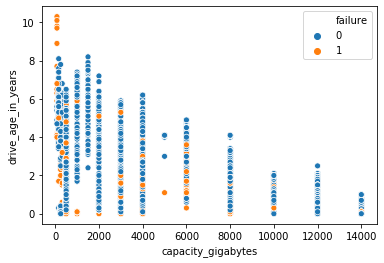

In [9]:
sns.scatterplot(x='capacity_gigabytes',y='drive_age_in_years',hue='failure',sizes=(20,200),data=df)


In [10]:
# drive age is 0 for 2779 observation

df['drive_age_in_years'].loc[lambda x: x== 0].index

Int64Index([   593,    748,    755,    763,    769,    798,    821,   1549,
              1617,   1618,
            ...
            168993, 169011, 169016, 169017, 169025, 169028, 169038, 169047,
            169050, 169052],
           dtype='int64', length=2779)

In [11]:
# Max age but drive has failed

df.iloc[1288]

serial_number                    WD-WCADW2290554
manufacturer                     Western Digital
model                                WDC WD800LB
capacity_gigabytes                            80
failure                                        1
drive_age_in_years                          10.3
reallocated_sectors_count                      0
reported_uncorrectable_errors                NaN
command_timeout                              NaN
current_pending_sector_count                   0
uncorrectable_sector_count                     0
Name: 1288, dtype: object

In [12]:
# Why is 0 listed in age???

df.iloc[169025]

serial_number                         ZJV3BFK8
manufacturer                           Seagate
model                            ST12000NM0007
capacity_gigabytes                     12000.1
failure                                      0
drive_age_in_years                           0
reallocated_sectors_count                    0
reported_uncorrectable_errors                0
command_timeout                              0
current_pending_sector_count                 0
uncorrectable_sector_count                   0
Name: 169025, dtype: object

In [13]:
(df.drive_age_in_years == 0).sum()

2779

In [14]:
top_model = [df.model=='ST12000NM0007']

In [15]:
top_model = pd.DataFrame(top_model) 

In [16]:
df

,serial_number,manufacturer,model,capacity_gigabytes,failure,drive_age_in_years,reallocated_sectors_count,reported_uncorrectable_errors,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,PL1311LAG1SJAA,Hitachi,Hitachi HDS5C4040ALE630,4000.8,0,5.0,0.0,NaN,NaN,0.0,0.0
1,Z305KB36,Seagate,ST4000DM000,4000.8,0,3.5,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,4.8,0.0,NaN,NaN,0.0,0.0
3,ZA11NHSN,Seagate,ST8000DM002,8001.6,0,3.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,5.5,0.0,NaN,NaN,0.0,0.0
5,Z305D5VF,Seagate,ST4000DM000,4000.8,0,3.6,0.0,0.0,0.0,0.0,0.0
6,Z3015L2E,Seagate,ST4000DM000,4000.8,0,4.2,0.0,0.0,0.0,0.0,0.0
7,PL1331LAHDYJYH,Hitachi,HGST HMS5C4040BLE640,4000.8,0,3.4,0.0,NaN,NaN,0.0,0.0
8,Z304LAHP,Seagate,ST4000DM000,4000.8,0,3.9,0.0,0.0,0.0,0.0,0.0
9,Z302B0GK,Seagate,ST4000DM000,4000.8,0,4.2,0.0,0.0,0.0,0.0,0.0


In [17]:
df.capacity_gigabytes.value_counts()

 4000.8     64886
 12000.1    50729
 8001.6     26108
-0.0         7031
 3000.6      6789
 2000.4      4678
 500.1       2547
 6001.2      2411
 14000.5     1302
 10000.8     1255
 1000.2       388
 1500.3       267
 250.1        211
 160.0        209
 320.1        116
 480.0         60
 5001.0        46
 80.0          32
 137.4          7
 250.0          1
Name: capacity_gigabytes, dtype: int64

In [18]:
df.head(170)

,serial_number,manufacturer,model,capacity_gigabytes,failure,drive_age_in_years,reallocated_sectors_count,reported_uncorrectable_errors,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,PL1311LAG1SJAA,Hitachi,Hitachi HDS5C4040ALE630,4000.8,0,5.0,0.0,NaN,NaN,0.0,0.0
1,Z305KB36,Seagate,ST4000DM000,4000.8,0,3.5,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,4.8,0.0,NaN,NaN,0.0,0.0
3,ZA11NHSN,Seagate,ST8000DM002,8001.6,0,3.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,5.5,0.0,NaN,NaN,0.0,0.0
5,Z305D5VF,Seagate,ST4000DM000,4000.8,0,3.6,0.0,0.0,0.0,0.0,0.0
6,Z3015L2E,Seagate,ST4000DM000,4000.8,0,4.2,0.0,0.0,0.0,0.0,0.0
7,PL1331LAHDYJYH,Hitachi,HGST HMS5C4040BLE640,4000.8,0,3.4,0.0,NaN,NaN,0.0,0.0
8,Z304LAHP,Seagate,ST4000DM000,4000.8,0,3.9,0.0,0.0,0.0,0.0,0.0
9,Z302B0GK,Seagate,ST4000DM000,4000.8,0,4.2,0.0,0.0,0.0,0.0,0.0


In [19]:
df.shape

(169073, 11)

In [20]:
df = prepare.unique(df)

In [21]:
df.shape

(162025, 11)

In [22]:
df_fail = pd.DataFrame(df.failure == 1)

In [23]:
type(df_fail)

pandas.core.frame.DataFrame

In [24]:
df_fail.sum()

failure    5922
dtype: int64

In [25]:
df_fail.head()

,failure
0,False
1,False
2,False
3,False
4,False


In [26]:
#df.reported_uncorrectable_errors.plot()

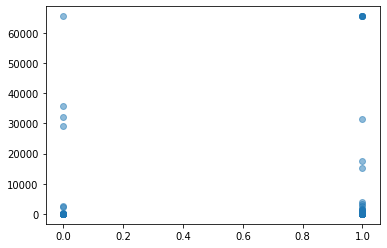

In [27]:
#x = df_fail.failure

plt.scatter(x = df.failure, y = df.reported_uncorrectable_errors, alpha=0.5)
plt.show()

In [28]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print()

serial_number
Z302B1HH           1
MJ1311YNG3792A     1
WDH2MY1Z           1
Z305D31J           1
ZA1293QS           1
Z303H78P           1
ZA13EWN8           1
Z302SV7X           1
8HJLJVUH           1
Z3025EXV           1
ZA12WYVA           1
ZA12ZBFQ           1
ZJV0TCLM           1
ZJV00NSE           1
AAG6130H           1
PL1331LAGRZ7PH     1
PL1331LAHBSUDH     1
Z4D0976H           1
PL1331LAHGVSMH     1
PL2331LAGUGXKJ     1
WD-WMC4M2932082    1
S300Z4HP           1
ZA180QRT           1
ZJV066D3           1
ZJV005HV           1
S300XA3R           1
Z302AK91           1
Z3014PNL           1
PL1331LAHD12UH     1
Z300H1MB           1
                  ..
PL2331LAGSSAGJ     1
AAG66X6H           1
AAHKKK9H           1
PL2331LAHAWPVJ     1
ZJV3CW7C           1
Z3014PLX           1
MJ0351YNG9X7TA     1
ZA13GZDE           1
S300Z7ZG           1
PL1331LAH3DPWH     1
Z302SZB0           1
ZJV4N2TD           1
ZJV0WEWC           1
W300K6X5           1
Z305GFEX           1
ZA139GHA           1

In [29]:
null = df[['reported_uncorrectable_errors', 'command_timeout']]
null

,reported_uncorrectable_errors,command_timeout
0,NaN,NaN
1,0.0,0.0
2,NaN,NaN
3,0.0,0.0
4,NaN,NaN
5,0.0,0.0
6,0.0,0.0
7,NaN,NaN
8,0.0,0.0
9,0.0,0.0


In [30]:
(df.reported_uncorrectable_errors == 0).sum()

100428

In [31]:
df.isnull().sum()

serial_number                        1
manufacturer                         0
model                                0
capacity_gigabytes                   0
failure                              0
drive_age_in_years                  60
reallocated_sectors_count          184
reported_uncorrectable_errors    57839
command_timeout                  57849
current_pending_sector_count       194
uncorrectable_sector_count         194
dtype: int64

In [38]:
def treat_nulls(df):
    df.reported_uncorrectable_errors = df.reported_uncorrectable_errors.fillna(value=0)
    df.command_timeout = df.command_timeout.fillna(value=0)
    df = df.dropna(axis=0)
    return df

In [39]:
df = treat_nulls(df)

In [40]:
df.isnull().sum()

serial_number                    0
manufacturer                     0
model                            0
capacity_gigabytes               0
failure                          0
drive_age_in_years               0
reallocated_sectors_count        0
reported_uncorrectable_errors    0
command_timeout                  0
current_pending_sector_count     0
uncorrectable_sector_count       0
dtype: int64

In [37]:
df.shape

(162025, 11)

In [41]:
df.head()

,serial_number,manufacturer,model,capacity_gigabytes,failure,drive_age_in_years,reallocated_sectors_count,reported_uncorrectable_errors,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,PL1311LAG1SJAA,Hitachi,Hitachi HDS5C4040ALE630,4000.8,0,5.0,0.0,0.0,0.0,0.0,0.0
1,Z305KB36,Seagate,ST4000DM000,4000.8,0,3.5,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,4.8,0.0,0.0,0.0,0.0,0.0
3,ZA11NHSN,Seagate,ST8000DM002,8001.6,0,3.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,5.5,0.0,0.0,0.0,0.0,0.0


In [65]:
find_uniques = df[['model', 'capacity_gigabytes']]
find_uniques.head(10)

,model,capacity_gigabytes
0,Hitachi HDS5C4040ALE630,4000.8
1,ST4000DM000,4000.8
2,Hitachi HDS5C3030ALA630,3000.6
3,ST8000DM002,8001.6
4,Hitachi HDS5C3030ALA630,3000.6
5,ST4000DM000,4000.8
6,ST4000DM000,4000.8
7,HGST HMS5C4040BLE640,4000.8
8,ST4000DM000,4000.8
9,ST4000DM000,4000.8


In [61]:
find_uniques.capacity_gigabytes.unique()

array([ 4000.8,  3000.6,  8001.6,   500.1,  6001.2,  2000.4,  1000.2,
          80. , 12000.1, 10000.8, 14000.5,  1500.3,   160. ,   320.1,
         250.1,  5001. ,   250. ])

In [62]:
find_uniques.model.unique()

array(['Hitachi HDS5C4040ALE630', 'ST4000DM000',
       'Hitachi HDS5C3030ALA630', 'ST8000DM002', 'HGST HMS5C4040BLE640',
       'ST500LM012 HN', 'ST6000DX000', 'HGST HMS5C4040ALE640',
       'WDC WD30EFRX', 'WDC WD5000BPKT', 'Hitachi HDS722020ALA330',
       'WDC WD10EADS', 'Hitachi HDS723030ALA640', 'HGST HDS5C4040ALE630',
       'WDC WD60EFRX', 'HGST HUH728080ALE600', 'TOSHIBA MD04ABA400V',
       'TOSHIBA MQ01ABF050', 'WDC WD20EFRX', 'WDC WD10EADX',
       'WDC WD800AAJS', 'ST8000NM0055', 'ST12000NM0007', 'ST4000DM001',
       'ST10000NM0086', 'ST4000DM005', 'HGST HUH721212ALN604',
       'TOSHIBA MG07ACA14TA', 'ST500LM030', 'HGST HUH721212ALE600',
       'WDC WD10EACS', 'ST31500541AS', 'ST3160318AS', 'ST4000DX000',
       'WDC WD5000LPVX', 'WDC WD1600AAJS', 'WDC WD800LB',
       'TOSHIBA MQ01ABF050M', 'TOSHIBA HDWF180', 'TOSHIBA HDWE160',
       'ST9320325AS', 'ST250LM004 HN', 'HGST HUS726040ALE610',
       'ST3160316AS', 'ST320LT007', 'HGST HDS724040ALE640', 'ST4000DX002',
      

In [74]:
find_uniques.groupby('model').count()

,capacity_gigabytes
model,
00MD00,1
HGST HDS5C4040ALE630,116
HGST HDS724040ALE640,40
HGST HMS5C4040ALE640,8637
HGST HMS5C4040BLE640,16314
HGST HMS5C4040BLE641,1
HGST HUH721010ALE600,20
HGST HUH721212ALE600,1564
HGST HUH721212ALN604,10875


In [76]:
find_uniques.groupby(['model','capacity_gigabytes']).count()

,
model,capacity_gigabytes
00MD00,4000.8
HGST HDS5C4040ALE630,4000.8
HGST HDS724040ALE640,4000.8
HGST HMS5C4040ALE640,4000.8
HGST HMS5C4040BLE640,4000.8
HGST HMS5C4040BLE641,4000.8
HGST HUH721010ALE600,10000.8
HGST HUH721212ALE600,12000.1
HGST HUH721212ALN604,12000.1


In [92]:
df['model'].value_counts()

ST12000NM0007              38271
ST4000DM000                36156
HGST HMS5C4040BLE640       16314
ST8000NM0055               14810
HGST HUH721212ALN604       10875
ST8000DM002                10160
HGST HMS5C4040ALE640        8637
Hitachi HDS5C3030ALA630     4563
Hitachi HDS722020ALA330     4503
Hitachi HDS5C4040ALE630     2639
ST6000DX000                 1912
HGST HUH721212ALE600        1564
TOSHIBA MG07ACA14TA         1302
ST10000NM0086               1235
WDC WD30EFRX                1167
HGST HUH728080ALE600        1082
Hitachi HDS723030ALA640     1000
ST500LM012 HN                804
TOSHIBA MQ01ABF050           589
WDC WD60EFRX                 471
ST4000DM001                  425
TOSHIBA MQ01ABF050M          410
WDC WD5000LPVX               343
WDC WD10EADS                 295
ST31500541AS                 264
ST500LM030                   261
ST4000DX000                  212
WDC WD20EFRX                 158
TOSHIBA MD04ABA400V          147
HGST HDS5C4040ALE630         116
          

In [98]:
df['model'].loc[lambda x: x== '00MD00'].index

Int64Index([], dtype='int64')

In [99]:
df.iloc[33381]

serial_number                             JK11A8B9J77MJF
manufacturer                                     Hitachi
model                            Hitachi HDS722020ALA330
capacity_gigabytes                                2000.4
failure                                                0
drive_age_in_years                                   5.1
reallocated_sectors_count                              0
reported_uncorrectable_errors                          0
command_timeout                                        0
current_pending_sector_count                           0
uncorrectable_sector_count                             0
Name: 34844, dtype: object